# Polynomial Curve-Fitting


### Let us start by generating the dataset

The polynomial curve we are trying to solve is a sine function given by:

\begin{equation}
f(x) = sin(2\pi x)
\end{equation}

As explained in the beginning of this page the sin function is what we are trying to find and what we have is the information which possess an underlying regularity just like most real life datasets. Therefor we will generate this information by randomly applying noise to the sin function with a standard deviation of 0.25 for $x \in \{0,1,....10\}$.

This is the implementation in python:

In [105]:
import numpy as np #for mathematical functions
from numpy.linalg import inv #to calculate the inverse of a matrix
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (16,8)

def sin(x):
    f = np.sin(2 * np.pi * x)
    return f

def generate_noise(x):
    f = x + np.random.normal(scale=0.25, size=x.shape)
    return f

X_train = np.linspace(0, 1, 10)
Y_train = generate_noise(sin(X_train))

At this point we have the dataset given as X_train and Y_train so let's plot the points below:

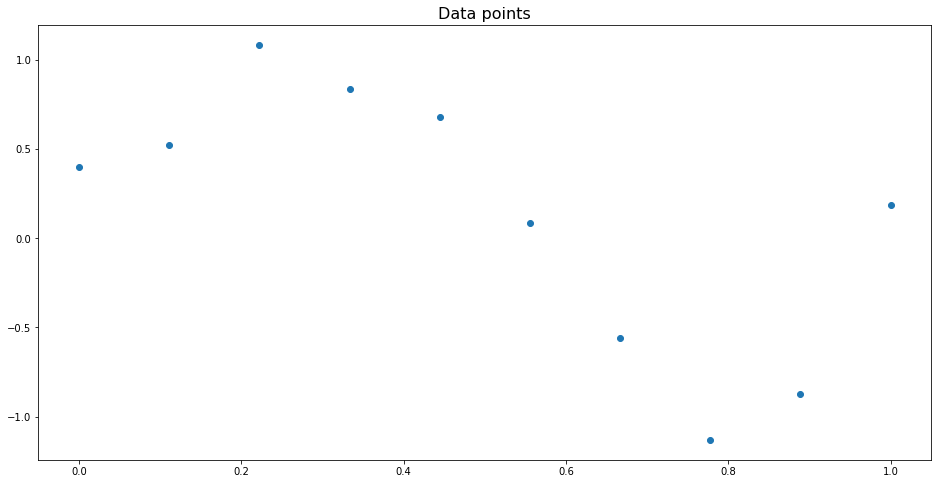

In [106]:
plt.plot(X_train, Y_train, 'o')
plt.title("Data points", fontsize = 16)
plt.show()

The above figure shows a set of information one would nomally get in real life. For this tutorial the aim is to exploit the training set in order to make predictions of the target value t for new input value x. We already know that the solution must form a sinusoidal curve and we will explore different mathematical approaches to come up with a solution.

## Polynomial function approach

This is a simple approach that fit the training data by making use of a polynomial function of the form:

\begin{equation}
y(x, \textbf{w}) = w_{0} + w_{1}x + w_{2}x^2 +...+ w_{M}x^M = \sum_{j = 0}^M w_{j}x^j
\end{equation}

where M is the polynomial order, and **w** is a vector denoting $w_0, . . . , w_M$.

The aim is to get the coeffitient values of $\textbf{w}$ and the solution is to minimize an error function that measures the
misfit between the y(x,**w**) and the training set data points. The error funtion used for this case is given by:

\begin{equation}
E(\textbf{w}) = \frac{1}{2}\sum_{n = 1}^N \{y(x, \textbf{w}) - t_n\}^2 
\end{equation}

The problem can be solved by choosing the value of vector $\textbf{w}$ for which E(**w**) is as small as possible.

To get the coeffitients of $\textbf{w}$ which minimizes the error function we let the derivative of the error function $E(\textbf{w}) = 0$


$$\frac{\partial E}{\partial w_i} = \frac{1}{2}\sum_{n = 1}^N(2x_{n}^i \{y(x, \textbf{w}) - t_n\}) = 0$$

$$\sum_{n = 1}^N \{\sum_{j = 0}^M w_jx_{n}^j - t_n\}x_{n}^i = 0$$

$$\sum_{n = 1}^N \{\sum_{j = 0}^M w_jx_{n}^{(j + i)}\} = \sum_{n = 1}^N t_n x_{n}^i$$

$$\sum_{j = 0}^M \sum_{n = 1}^N x_{n}^{(j + i)} w_j = \sum_{n = 1}^N t_n x_{n}^i$$

Finally let:

$$ A_{ij} = \sum_{n = 1}^N x_{n}^{(j + i)} $$ 

and 

$$ T_i = \sum_{n = 1}^N t_n x_{n}^i$$
 
Therefore:

$$\sum_{j = 0}^M A_{ij} w_j = T_i$$

We can now solve for the vector $\textbf{W}$ which we will do in code shortly, by the way this vector is called a vector of weights.

Now lets implement this approach in python:

In [89]:
#y(x, w)
def y(x, W, M):
    Y = np.array([W[j] * (x ** j) for j in range(M+1)])
    return Y.sum()

#The solution for minimizing the error function. Returns the Weights(Vector W)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x ** (i+j)).sum()
        
    T = np.array([((x ** i)*t).sum() for i in range(M+1)])
    W = np.linalg.solve(A, T)
    return W 

We will get the solutions for M = [0,1,2,3,9] and compare the results

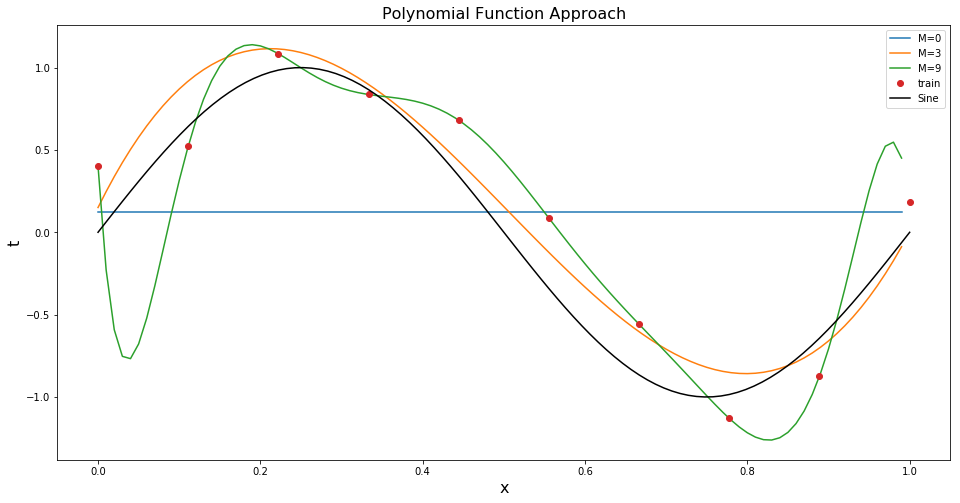

In [107]:
for M in [0,3,9]:
    W = E(X_train, Y_train, M)
    y_estimate = [y(x, W, M) for x in np.arange(0, 1, 0.01)]
    plt.plot(np.arange(0, 1, 0.01), y_estimate, label=f'M={M}')
    plt.xlabel('x', fontsize = 16)
    plt.ylabel('t', fontsize = 16)
    plt.title("Polynomial Function Approach", fontsize = 16)

plt.plot(X_train, Y_train, 'o',  label='train') 
plt.plot(np.linspace(0, 1, 100), sin(np.linspace(0, 1, 100)),'black', label='Sine')
plt.legend()
plt.show()